# Project Checkpoint

### Names: Pranav Nalamwar, Timothy Brown, Vincenzo Donofrio

### Project: Habitable Zone Predictions

# 1. Statement of Problem

The overall problem of this project is to analyze host star and exoplanet data to visualze the complete star system and its habitable zone.

This project is important because it allows the ability to visualize a plethora of somewhat confusing parameters all in one simple plot. More importantly, however, it allows our group the opportunity to analyze a difficult data set and produce results that make sense and can serve as sort of a basic handbook for the so far analyzed exoplanets. 

This project sparks interest in two aspects: its topic and its originality. The topic of creating habitable zones based on known data incites great interest to try and create a product that resembles reality. Additionally, the lack of truly reliable sources involving our objective that already exists allows us to sort of dive into the unknown and compare our nuanced approach to those limited others.

This project does, though, provide a higher level of difficulty for this course. Perhaps the most intensive part is not any of the coding (although it comes a close second), but the analysis of the involved data. This project requires us to iterate through enough data to reach a satisying conclusion, but at the same time not enough to avoid having to piece some of that data further together to reach that conclusion. To 'clean' this data will require basic to slightly higher level astrophysical knowledge which will increase the difficulty of this project. Addressing the coding of the project, as stated before, requires similar difficulty. To create an efficient model that iterates through the data and output all needed information will be difficult which is in addition to the multiple visual aids we sought for (2d + animated, 3d plus animated).   

Distribution of responsibilities:

We have highlighted a total of seven responsibilities that will be distributed evenly to the members of the group. Pranav will be responsible for collecting/cleaning the data and modeling; Vincenzo will be responsible for analyzing the data for the model and implementing both the relevant theoretical and experimental physics into the model. Tim will be responsible for the visualization(output) of the project, as well as testing every aspect of the output. As a group, every member is responsible for the report of the project.

# 2. Data We Will Use

The data we will use is titled the <em> Nasa Exoplanet Archive </em> (https://exoplanetarchive.ipac.caltech.edu). This data is likely the most qualified source on this topic. It has all the data needed and is included in an easy to read fashion. With that said, some of the data is left blank for what we can determine with two reasons. The first reason is that some of the data simply has not been collected yet as observing exoplanets is very young field, still. The other is that the source chose to leave some of the data out that can be calculated using the other data and few assumptions, a choice made probably because they would rather collect that data in time. To make up for this, we will make those few assumptions and calculate the few missing data with the known in our model which allows us to compute a more complete model.

Description: This dataset includes an up-to-date table of all the exoplanets observed. Each data point is recently updated to the best of its ability.

Below is the dataset; the columns used are the necessary inputs needed for the project (these were selected from the site specifically, with the other hundred or so columns dropped as they were unnecessary).

In [1]:
import pandas as pd

exoplanetdata = pd.read_csv('dataexoplanet.csv', skiprows = 18)
exoplanetdata

pl_hostname     pl_name  pl_pnum    pl_orbper  pl_orbsmax  pl_orbeccen  \
0         11 Com    11 Com b        1   326.030000    1.290000       0.2310   
1         11 UMi    11 UMi b        1   516.219970    1.530000       0.0800   
2         14 And    14 And b        1   185.840000    0.830000       0.0000   
3         14 Her    14 Her b        1  1773.400020    2.930000       0.3700   
4       16 Cyg B  16 Cyg B b        1   798.500000    1.660000       0.6800   
...          ...         ...      ...          ...         ...          ...   
4136     tau Gem   tau Gem b        1   305.500000    1.170000       0.0310   
4137     ups And   ups And b        3     4.617033    0.059222       0.0215   
4138     ups And   ups And c        3   241.258000    0.827774       0.2596   
4139     ups And   ups And d        3  1276.460000    2.513290       0.2987   
4140      xi Aql    xi Aql b        1   136.750000    0.680000       0.0000   

      pl_bmassj  pl_radj  st_teff  st_mass  st_rad  st_lum  
0       19.4000      NaN   4742.0     2.70   19.00   2.243  
1       14.7400      NaN   4213.0     2.78   29.79     NaN  
2        4.8000      NaN   4813.0     2.20   11.00   1.763  
3        4.6600      NaN   5338.0     0.90    0.93     NaN  
4        1.7800      NaN   5750.0     1.08    1.13     NaN  
...         ...      ...      ...      ...     ...     ...  
4136    20.6000      NaN   4388.0     2.30   26.80     NaN  
4137     0.6876      NaN      NaN     1.30    1.56     NaN  
4138     1.9810      NaN      NaN     1.30    1.56     NaN  
4139     4.1320      NaN      NaN     1.30    1.56     NaN  
4140     2.8000      NaN   4780.0     2.20   12.00   1.839  

[4141 rows x 12 columns]

# 3. Model

The model we are starting off with is a basic API that is consisted more of 'hard-code' and loops. This model is so far sufficient for a 2D non-animated model, but we are currently working on transforming this model into a class/OOP API that is more efficient and will allow for an easier animation project.

# 4. Testing

# 5. Results

# 6. Conclusions

# Code

In [4]:
# 2D, non-animated
# imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random 
import pandas as pd
from random import sample
from matplotlib.patches import Ellipse

# Setting up dataframe
exoplanetdata = pd.read_csv('dataexoplanet.csv', skiprows = 18) 
exoplanetdata['st_lum'] = exoplanetdata['st_lum'].fillna(0) # Changing nan to 0 for eaiser indexing
exoplanetdata['pl_orbsmax'] = exoplanetdata['pl_orbsmax'].fillna(0) # Changing nan to 0 for eaiser indexing
exoplanetdata['pl_radj'] = exoplanetdata['pl_radj'].fillna(0.25) # Changing nan to 0 for eaiser indexing
exoplanetdata['st_rad'] = exoplanetdata['st_rad'].fillna(1) # Changing nan to 1 for eaiser indexing
exoplanetdata['st_teff'] = exoplanetdata['st_teff'].fillna(4920) # Changing nan to 4920 K for eaiser indexing
exoplanetdata['pl_orbper'] = exoplanetdata['pl_orbper'].fillna(50) # Changing nan to 50 days for eaiser indexing
exoplanetdata['pl_orbeccen'] = exoplanetdata['pl_orbeccen'].fillna(0) # Changing nan to 0 for eaiser indexing
exoplanetdata['st_mass'] = exoplanetdata['st_mass'].fillna(1) # Changing nan to 0 for eaiser indexing
exoplanetdata['pl_bmassj'] = exoplanetdata['pl_bmassj'].fillna(0.5) # Changing nan to 0 for eaiser indexing
exoplanetdata = exoplanetdata.set_index('pl_hostname') 

class generator():
    '''This class is designed to generate the habitable zones diagram for each star system'''

    def __init__(self,Star_name):
        '''Initializing object by star name'''
        self.Star_name = Star_name
        self.Kepler_star_data = exoplanetdata.loc[[Star_name]]
    
    def analysis(self):
                
        # Star Luminosity - Better way to do this??/ maybe not with current dataframe
        # if originally no exact luminosity is presented in data seat, we can make a good estimate with L = R^2*T^4
        Star_Luminosity = []

        if self.Kepler_star_data['st_lum'].iloc[0] == 0: 
            Star_Luminosity.append((self.Kepler_star_data['st_rad'].iloc[0]**2)*((self.Kepler_star_data['st_teff'].iloc[0]/5778)**4))

        else:
            Star_Luminosity.append(10**(self.Kepler_star_data['st_lum'].iloc[0])) 

        Star_Luminosity = str(Star_Luminosity)
        Star_Luminosity =  Star_Luminosity.strip('[').strip(']')
        Star_Luminosity = round(float(Star_Luminosity),3)
        print(self.Star_name,'has a luminosity of',Star_Luminosity, 'Solar units')
        
        self.Star_Luminosity = Star_Luminosity

        # star size (plot units; to show relative size of stars)
        Star_size = []

        if self.Kepler_star_data['st_rad'].iloc[0] >= 0 and self.Kepler_star_data['st_rad'].iloc[0] <= 1:
            Star_size.append(0.05)
        elif self.Kepler_star_data['st_rad'].iloc[0] > 1 and self.Kepler_star_data['st_rad'].iloc[0] <= 2:
            Star_size.append(0.15)
        elif self.Kepler_star_data['st_rad'].iloc[0] > 2 and self.Kepler_star_data['st_rad'].iloc[0] <= 5:
            Star_size.append(0.25)
        elif self.Kepler_star_data['st_rad'].iloc[0] > 5 and self.Kepler_star_data['st_rad'].iloc[0] <= 10:
            Star_size.append(0.35)
        elif self.Kepler_star_data['st_rad'].iloc[0] > 10:
            Star_size.append(0.45)

        Star_size = str(Star_size)
        Star_size =  Star_size.strip('[').strip(']')
        Star_size = float(Star_size)
        print('Star size is', self.Kepler_star_data['st_rad'].iloc[0],'Solar units')
        print('Star size is',Star_size,'map units')
        self.Star_size = Star_size
        
        # Number of exoplanets - not needed for now
        number_exo = self.Kepler_star_data['pl_pnum'].iloc[0]

        # Exoplanet's semi-major axes
        planet_axes_list = []
        for i in range(len(self.Kepler_star_data['pl_orbsmax'])):
            if self.Kepler_star_data['pl_orbsmax'].iloc[i] == 0:
                axis = (((((self.Kepler_star_data['pl_orbper'].iloc[i]*86400)**2)*(6.67E-11)*(self.Kepler_star_data['st_mass'].iloc[i]*2E+30 + self.Kepler_star_data['pl_bmassj'].iloc[i]*1.898E+27))/(4*np.pi**2))**(1/3))/1.496E+11
                planet_axes_list.append(round(axis,3)) 

            else:
                planet_axes_list.append(round(self.Kepler_star_data['pl_orbsmax'].iloc[i],3))
        planet_axes_list = sorted(planet_axes_list, key = lambda x:float(x))
        
        self.planet_axes_list = planet_axes_list


        # Habitable zone function
        # Limits 0.9 and 1.5 are sourced from britannica.com (https://www.britannica.com/science/habitable-zone)
        def habit_zone(L):
            # L input is given star's luminosity (in Solar units)
            Lsun = 1.0 # Luminosity of Sun (in Solar units)
            d_inner = round(0.9*(np.sqrt(L/Lsun)),3)
            #print('Inner limit is',d_inner,'AU')
            d_outer = round(1.5*(np.sqrt(L/Lsun)),3)
            #print('Outer limit is',d_outer,'AU')

            return d_inner, d_outer    
        
        inner_limit = habit_zone(self.Star_Luminosity)[0]
        outer_limit = habit_zone(self.Star_Luminosity)[1]
        
        self.inner_limit = inner_limit
        self.outer_limit = outer_limit
        print('The inner limit is',inner_limit,' AU; the outer limit is', outer_limit, 'AU')

        # Creating data labels
        planet_index = ['b','c','d','e','f','g','h','i','j','k']
        planet_index_rows = []
        for i in range(len(planet_axes_list)):
            index = self.Star_name + planet_index[i]
            planet_index_rows.append(index)
        
        self.planet_index_rows = planet_index_rows
        # Eccentricity
        Eccen = []
        for i in range(len(planet_axes_list)):
            Eccen.append(self.Kepler_star_data['pl_orbeccen'].iloc[i])

        print('The eccentricity of the orbits:', Eccen)

        semi_minor = []
        for i in range(len(planet_axes_list)):
            semi_minor.append(round(planet_axes_list[i]*np.sqrt(1-Eccen[i]),3))
        
        self.semi_minor = semi_minor
        
        Planet_temp = []
        A = 0.3 # albedo
        for i in planet_axes_list:
            planet_temp = self.Kepler_star_data['st_teff'].iloc[0]*((self.Kepler_star_data['st_rad'].iloc[0]/(2*i*215.032))**(1/2)*(1-A)**(1/4))
            Planet_temp.append(round(planet_temp,2))
        
        self.Planet_temp = Planet_temp
        
        # If planet is within 0 and 100 Celsius and within the 'green' zone
        
        Yes_No_list = []
        for i in range(len(Planet_temp)):
            if Planet_temp[i] >= 273 and Planet_temp[i] <= 373 and planet_axes_list[i] >= inner_limit and planet_axes_list[i] <= outer_limit:
                Yes = 'Yes'
                Yes_No_list.append(Yes)
            elif Planet_temp[i] >= 200 and Planet_temp[i] <=450 and planet_axes_list[i] >= inner_limit and planet_axes_list[i] <= outer_limit:
                Maybe = 'Likely'
                Yes_No_list.append(Maybe)
            else:
                No = 'No'
                Yes_No_list.append(No)
        
        self.Yes_No_list = Yes_No_list
        
        Yes_No_list_Zone = []
        for i in range(len(planet_axes_list)):
            if planet_axes_list[i] >= inner_limit and planet_axes_list[i] <= outer_limit:
                Yes = 'Yes'
                Yes_No_list_Zone.append(Yes)
            elif planet_axes_list[i] <= inner_limit or planet_axes_list[i] >= outer_limit:
                No = 'No'
                Yes_No_list_Zone.append(No)
        
        self.Yes_No_list_Zone = Yes_No_list_Zone
        
        Jupiter_list = []
        for i in range(len(planet_axes_list)):
            if self.Kepler_star_data['pl_radj'].iloc[i] < 0.5:
                Smaller = 'Smaller'
                Jupiter_list.append(Smaller)
            elif self.Kepler_star_data['pl_radj'].iloc[i] >= 0.5 and self.Kepler_star_data['pl_radj'].iloc[i] < 1.5:
                Yes = 'Yes'
                Jupiter_list.append(Yes)
            elif self.Kepler_star_data['pl_radj'].iloc[i] >= 1.5:
                Larger = 'Larger'
                Jupiter_list.append(Larger)
        
        self.Jupiter_list = Jupiter_list
    
        
    def plotting(self):
                
        
        # ZONE HABITABILITY (Blue, Green, Red)

        theta = np.linspace(0., 2.*np.pi, 100, endpoint=True) # For circle

        x_red = self.inner_limit*np.cos(theta) # Red zone
        y_red = self.inner_limit*np.sin(theta)

        x_green = self.outer_limit*np.cos(theta) # Green zone
        y_green = self.outer_limit*np.sin(theta)

        x_blue = (self.outer_limit+0.5)*np.cos(theta) # Blue zone
        y_blue = (self.outer_limit+0.5)*np.sin(theta) 

        xsun = (self.Star_size)*np.cos(theta) # Sun 
        ysun = (self.Star_size)*np.sin(theta)

        # PLOTTING

        fig, ax = plt.subplots(figsize=(20, 20)) 

        #set the limits of the figure (based on last inputted radii)
        ax.set_xlim(-self.outer_limit-0.6, self.outer_limit+0.6) 
        ax.set_ylim(-self.outer_limit-0.6, self.outer_limit+0.6) 

        # Fill in habitability zones based off limits 
        ax.fill_between(x_blue, y_blue, -y_blue, color='blue',alpha=0.8)
        ax.fill_between(x_green, y_green, -y_green, color='green',alpha=0.8)
        ax.fill_between(x_red, y_red, -y_red, color='red',alpha=0.8)
        ax.fill_between(xsun, ysun, -ysun, color='yellow')
         
        # Setting up orbits
        Circle_list = []
        for i in range(len(self.planet_axes_list)):
            if self.planet_axes_list[i] > self.Star_size: 
                Circle_index = Ellipse((0,0), width = self.planet_axes_list[i]*2, height = self.semi_minor[i]*2 , color='black', fill=False,alpha = 2,animated = True)
                Circle_list.append(Circle_index)

            elif self.planet_axes_list[i] <= self.Star_size:
                Circle_index = Ellipse((0,0), width = (self.planet_axes_list[i] + (xsun[0]))*2 ,height = (self.semi_minor[i] + xsun[0])*2,color='black', fill=False,alpha = 2,animated = True)
                Circle_list.append(Circle_index)


        # Display orbits
        for i in Circle_list:
            ax.add_artist(i)

        # Add planet (circle) marker
        colors_marker = ['bo','ro','go','co', 'mo', 'yo', 'ko','mo','co','yo'] # color of planet
        colors_marker = sample(colors_marker, len(self.planet_axes_list))

        marker_const_x = [1,-1,0,0,1,-1,0,0,1,-1]
        marker_position_x = []
        marker_position_x_sun = []
        for i in range(len(self.planet_axes_list)):
            marker_position_x.append(self.planet_axes_list[i]*marker_const_x[i])
            marker_position_x_sun.append((self.planet_axes_list[i]+(self.Star_size))*marker_const_x[i])

        marker_const_y = [0,0,1,-1,0,0,1,-1,0,0]
        marker_position_y = []
        marker_position_y_sun = []
        for i in range(len(self.planet_axes_list)):
            marker_position_y.append(self.semi_minor[i]*marker_const_y[i])
            marker_position_y_sun.append((self.semi_minor[i]+(self.Star_size))*marker_const_y[i])


        for i in range(len(self.planet_axes_list)):
            if self.planet_axes_list[i] > self.Star_size and self.Kepler_star_data['pl_radj'].iloc[i] < 0.5:
                plt.plot(marker_position_x[i],marker_position_y[i],colors_marker[i],ms = 8, label = (self.planet_axes_list[i],self.semi_minor[i],self.planet_index_rows[i]), alpha = 1)

            elif self.planet_axes_list[i] > self.Star_size and self.Kepler_star_data['pl_radj'].iloc[i] >= 0.5 and self.Kepler_star_data['pl_radj'].iloc[i] < 1.5:
                plt.plot(marker_position_x[i],marker_position_y[i],colors_marker[i],ms = 14, label = (self.planet_axes_list[i],self.semi_minor[i],self.planet_index_rows[i]), alpha = 1)

            elif self.planet_axes_list[i] > self.Star_size and self.Kepler_star_data['pl_radj'].iloc[i] >= 1.5:
                plt.plot(marker_position_x[i],marker_position_y[i],colors_marker[i],ms = 20, label = (self.planet_axes_list[i],self.semi_minor[i],self.planet_index_rows[i]), alpha = 1)   

            elif self.planet_axes_list[i] <= self.Star_size and self.Kepler_star_data['pl_radj'].iloc[i] < 0.5:
                plt.plot(marker_position_x_sun[i],marker_position_y_sun[i],colors_marker[i],ms = 8, label = (self.planet_axes_list[i],self.semi_minor[i],self.planet_index_rows[i]), alpha = 1)

            elif self.planet_axes_list[i] <= self.Star_size and self.Kepler_star_data['pl_radj'].iloc[i] >= 0.5 and self.Kepler_star_data['pl_radj'].iloc[i] < 1.5:
                plt.plot(marker_position_x_sun[i],marker_position_y_sun[i],colors_marker[i],ms = 14, label = (self.planet_axes_list[i],self.semi_minor[i],self.planet_index_rows[i]), alpha = 1)

            elif self.planet_axes_list[i] <= self.Star_size and self.Kepler_star_data['pl_radj'].iloc[i] >= 1.5:
                plt.plot(marker_position_x_sun[i],marker_position_y_sun[i],colors_marker[i],ms = 20, label = (self.planet_axes_list[i],self.semi_minor[i],self.planet_index_rows[i]), alpha = 1)

        plt.legend(title="Semi-major axis (AU); Semi-minor axis (AU)",prop={'size': 15})
        plt.title(self.Star_name, fontsize=30)
        print('The exoplanets inlcude', self.planet_index_rows)
        
        Habitability = pd.DataFrame(data = list(zip(self.Planet_temp,self.Jupiter_list,self.Yes_No_list_Zone,self.Yes_No_list)),index = self.planet_index_rows, columns = ['Surface Temperature (K)','Jupyter-like?', 'Within Habitable Zone?','Habitable?'])
        display(Habitability)
        
        plt.show()



# ------------------------------------------------------------------------------------------------------------------
# Check if planets are habitable (temperature; 273 K to 373 K)
# We can approximate planet surface temperature with the equation: T_planet = T_star*(R_star/2*semi-major)**(1/2)*(1-A)**(1/4)
# A is the planets albedo - good estimate is 0.35
# We multiply by 215.032 because this is the factor to convert AU to Solar radius 



# DataFrame of habitability check        



Kepler-9 has a luminosity of 0.916 Solar units
Star size is 0.96 Solar units
Star size is 0.05 map units
The inner limit is 0.861  AU; the outer limit is 1.436 AU
The eccentricity of the orbits: [0.0609, 0.06691, 0.0]
The exoplanets inlcude ['Kepler-9b', 'Kepler-9c', 'Kepler-9d']


Surface Temperature (K) Jupyter-like? Within Habitable Zone?  \
Kepler-9b                  1518.58           Yes                     No   
Kepler-9c                   659.86           Yes                     No   
Kepler-9d                   523.73       Smaller                     No   

          Habitable?  
Kepler-9b         No  
Kepler-9c         No  
Kepler-9d         No

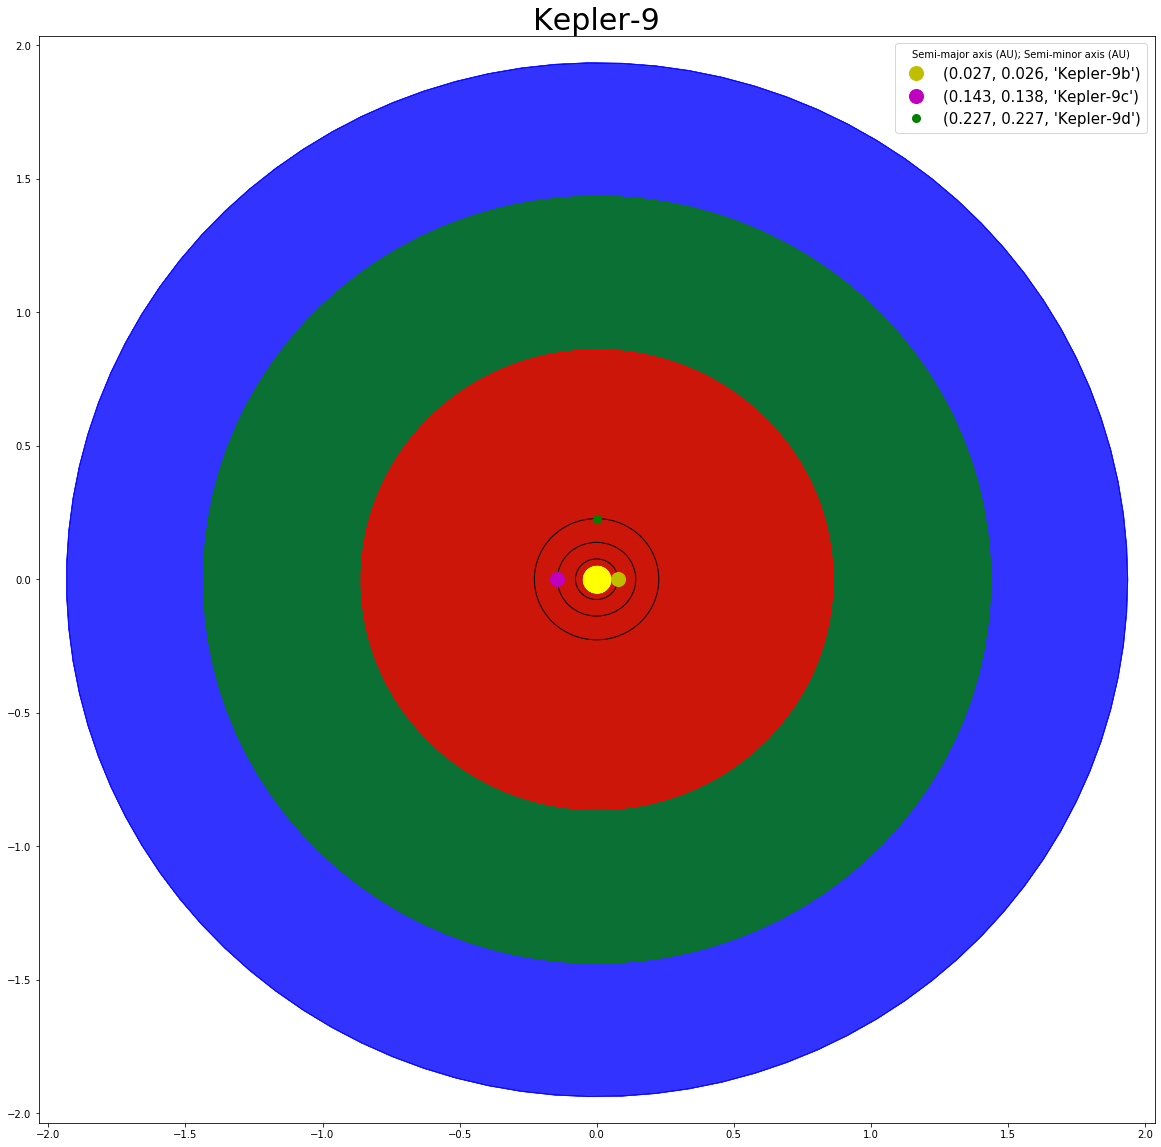

In [5]:
example = generator('Kepler-9')
example.analysis()
example.plotting()